# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) 

The assignment is in the last cell.

In [1]:
#!pip install seaborn

## This cell automatically downloads Capital Bikeshare data

In [2]:
#import sys
#sys.path.append('..')
#from utils.bikeshare import download_bikeshare_data

#download_bikeshare_data(2016, 1, '../data/')

### And here we read in the data

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('./2016-Q1-Trips-History-Data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


### Create a new column that represents the hour of the day 

In [4]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

### Aggregate to get a count per hour/minute of the day across all trips

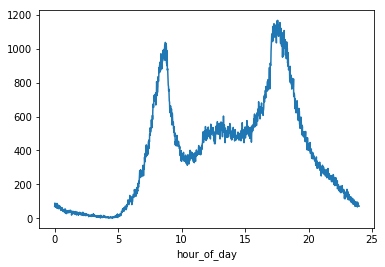

In [5]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()
# import seaborn as sns

# sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend


## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

MSE Degree=5 32817.005564196304
**MSE Degree=10 13212.311556765288
MSE Degree=20 42776.374777107965


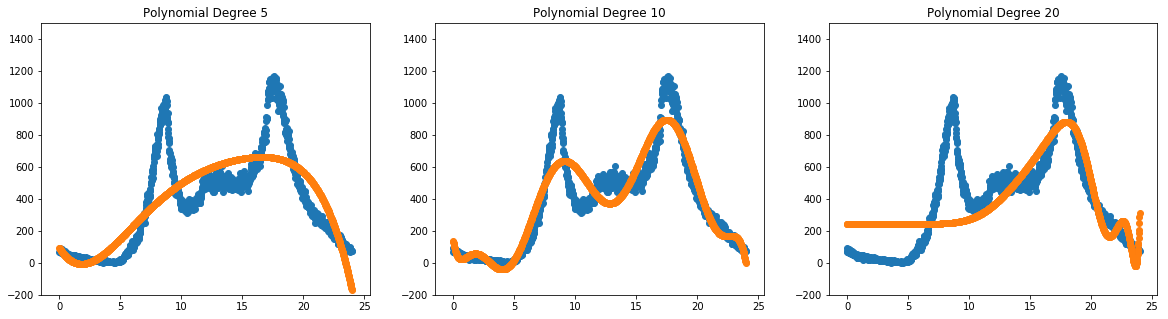

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics
import numpy as np
np.random.seed(1234)

x = hours['hour'].values.reshape(-1,1)
y = hours['Duration (ms)'].values.reshape(-1,1)

#plt.subplot(131)
fig = plt.figure(figsize=(20,5))

#degree 5
ax = fig.add_subplot(1,3,1)
ax.set_ylim([-200,1500])
poly = PolynomialFeatures(degree=5)
xpoly = poly.fit_transform(x)
lr = linear_model.LinearRegression()
lr.fit(xpoly, y)
ax.scatter(x,y)
ypoly=np.sum(xpoly*lr.coef_,axis=1)+lr.intercept_
ax.scatter(x,ypoly)
ax.set_title('Polynomial Degree 5')
print('MSE Degree=5 ' + str(metrics.mean_squared_error(y, ypoly)))


#degree 10
ax = fig.add_subplot(1,3,2)
ax.set_ylim([-200,1500])
poly = PolynomialFeatures(degree=10)
xpoly = poly.fit_transform(x)
lr = linear_model.LinearRegression()
lr.fit(xpoly, y)
ax.scatter(x,y)
ypoly=np.sum(xpoly*lr.coef_,axis=1)+lr.intercept_
ax.scatter(x,ypoly)
ax.set_title('Polynomial Degree 10')
xfit = xpoly
print('**MSE Degree=10 ' + str(metrics.mean_squared_error(y, ypoly)))


#degree 20
ax = fig.add_subplot(1,3,3)
ax.set_ylim([-200,1500])
poly = PolynomialFeatures(degree=20)
xpoly = poly.fit_transform(x)
lr = linear_model.LinearRegression()
lr.fit(xpoly, y)
ax.scatter(x,y)
ypoly=np.sum(xpoly*lr.coef_,axis=1)+lr.intercept_
ax.scatter(x,ypoly)
ax.set_title('Polynomial Degree 20')
print('MSE Degree=20 ' + str(metrics.mean_squared_error(y, ypoly)))

## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


MSE Degree=10, alpha=0.0 13212.688094307303
MSE Degree=10, alpha=1.0 13313.728085878683
MSE Degree=10, alpha=10.0  13502.584719234948


C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.229853e-30
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.229853e-29
  overwrite_a=True).T


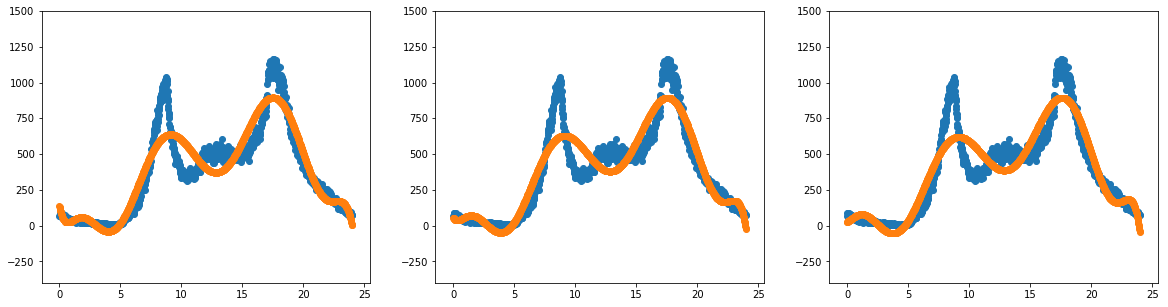

In [7]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set_ylim([-400,1500])
ridge = linear_model.Ridge(alpha=0.0,fit_intercept=True)
ridge.fit(xfit,y)
ax.scatter(x,y)
yridge=np.sum(xfit*ridge.coef_,axis=1)+ridge.intercept_
ax.scatter(x,yridge)
print('MSE Degree=10, alpha=0.0 ' + str(metrics.mean_squared_error(y, yridge)))

ax=fig.add_subplot(1,3,2)
ax.set_ylim([-400,1500])
ridge = linear_model.Ridge(alpha=1.0,fit_intercept=True)
ridge.fit(xfit,y)
ax.scatter(x,y)
yridge=np.sum(xfit*ridge.coef_,axis=1)+ridge.intercept_
ax.scatter(x,yridge)
print('MSE Degree=10, alpha=1.0 ' + str(metrics.mean_squared_error(y, yridge)))

ax = fig.add_subplot(1,3,3)
ax.set_ylim([-400,1500])
ridge = linear_model.Ridge(alpha=10.0,fit_intercept=True)
ridge.fit(xfit,y)
ax.scatter(x,y)
yridge=np.sum(xfit*ridge.coef_,axis=1)+ridge.intercept_
ax.scatter(x,yridge)
print('MSE Degree=10, alpha=10.0  ' + str(metrics.mean_squared_error(y, yridge)))

I would recommend the linear regression model with a Polynomial fit with degree 10. This model has the lowest MSE among poly models with degrees 5 and 20. It also performs better than ridge regression with alphas 1.0 and 10.0

LinearRegression

| Degree | MSE |
| --- | --- |
| 5 | 32817 |
| *10 | 13212 |
| 20 | 42776 |

RidgeRegression

| Alpha | MSE |
| --- | --- |
| *0.0 | 13213 |
| 1.0 | 13314 |
| 10.0 | 13503 |